In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import trapz

In [2]:
def make_random_ipol_table(x, y, n):
    xlow = x[0] - 0.5 * (x[1]-x[0])
    xhigh = x[n-1] + 0.5 * (x[n-1]-x[n-2])
    x2 = y2 = np.zeros(n+1) 
    y2[0] = 0.
    y2[1] = y[0]
    for i in range(0,n):
        if i+1<n:
            y2[i+1] = y2[i] + y[i] * 0.5*((x[i+1])-x[i-1])/(x[1]-x[0])
        else:
            y2[i+1] = y2[i] + y[i] * 0.5*((xhigh)-x[i-1])/(x[1]-x[0])
    xr=[]
    yr=[]
    for i in range(0,n):
        xr.append(0.5*(x[i-1]+x[i]))
        yr.append(y2[i]/y2[n])
        
    xr[0] = xlow;
    xr[-1] = xhigh
    return xr, yr

In [3]:
# /* ------------------------- random_from_ipol_table ---------------------- */
# /**
#  *  @short Fast random number table lookup.
#  *
#  *  Get a random number from a lookup table as created by
#  *  make_random_ipol_table() for a tabulated probability distribution.
#  *
#  *  @param  xr   Table as returned from make_random_ipol_table()
#  *  @param  yr   Table as returned from make_random_ipol_table()
#  *  @param  n	 as provided to make_random_ipol_table()
#  *  @param  randnr  A uniform pseudorandom number in [0:1]
#  *  @return random number according to table
#  *
# */

def random_from_ipol_table(xr, yr,randnr):
    fun = interp1d(yr,xr);
    return fun(randnr)

In [10]:
# Full Configuration Parameters:
pixels_parallel = 0
num_gins = 1
#cmera_config_file:

camera_pixels = 2048
quantum_eff = []
pm_photoelectron_spectrum = []
pm_voltage_variation = 0.0 
pm_transit_time = 4
transit_time_jitter = 0.2
gain_variation = 0.05 # By how much the gain may vary between PMs after the voltage has been adjusted for approximately the smae ain (fraction?)
qe_variation = 0.04
min_photoelectrons = 15
store_photoelectrons = 12
nightsky_background = 0.038
disc_bins = 120
disc_start = 3
discriminator_pulse_shape = []
discriminator_amplitude = 20
trigger_pixels = 2
discriminator_threshold = 217
discriminator_var_threshold = 2
discriminator_time_over_threshold = 1
discriminator_var_time_over_threshold = 0
discriminator_sigsum_over_threshold  = 0                        # pVs
discriminator_var_sigsum_over_threshold  = 0                    # pVs
discriminator_hysteresis             = 0.0                      # mV

# Outputs from pixel 'logic':
discriminator_gate_length= 8.0                                  # Jim+Rich
discriminator_var_gate_length = 1                               
discriminator_output_amplitude = 42                             # mV
discriminator_output_var_percent = 0                            # is 10% for HESS
discriminator_rise_time = 1.0                                   # is 1ns for HESS
discriminator_fall_time = 1.0                                   # is 1ns for HESS
default_trigger = 'Majority'
teltrig_min_time  =  0.5                                        # ns
teltrig_min_sigsum = 0.0                                        # pV.s

# trigger_delay_compensation = 0,0,0                              #

# % only_triggered_arrays=0
only_triggered_telescopes=1  
num_gains = 1                                                   # CHEC readout is with one gain only

# % Sampling rate in MHz:
fadc_mhz = 1000                                                 # MHz sampling rate increased from prod2 333MHz Jim+Rich

fadc_pulse_shape = []                             # Wider Pulse than with checM due to CHECS preamp. Expected, Jim+Rich+Tom

# % Read-out of a 80 ns window (within simulated 96 ns) following the actual trigger:
fadc_bins = 128         # (prod-3 tuned)                        % Number of time intervals simulated for ADC.  % increased from 35 - JIM & RICH
fadc_sum_bins = 96      # (prod-3 tuned) heide                  % Number of ADC time intervals actually summed up. % increased from 20 - JIM & RICH
fadc_sum_offset = 24    # (prod-3 tuned)                        % How many intervals summation starts before telescope trigger. % JIM & RICH
photon_delay = 5        # (prod-3 tuned, 0 original) 
fadc_max_signal = 65535  # Detailed response and analysis of saturated pulses needs post-processing.

fadc_pedestal = 40                                              # Per time slice (positive signals only: unsigned!) increased from 4 JIM & RICH
fadc_amplitude = 8                                              #The peak amplitude in a time slice for high gain. increased from 4 JIM & RICH
fadc_noise = 2    

### From the code
interval = 1000./fadc_frequency
disc_rise_steps = int((disc_rise_time *DISC_BITS_PER_BIN + 0.5)/interval)
disc_fall_steps = int((disc_fall_time *DISC_BITS_PER_BIN + 0.5)/interval)
# if these are both 0 (i.e. rise time and fall time = 0), then use_trigger_logic = 0
multiplicity_offset = 
disc_ac_coupled = 
fadc_ac_coupled = 
trigger_neighboured = 
read_pulse_shape(num_gains, fadc_pulse_fname, disc_pulse_fname, 100/fadc_frequency, fhspe_tel?,  ....)
shape
shape_length
bkg_shape
bkg_shape_length
disc_shape
disc_shape_length
signal_area (fshape_area_tel?)
bkgrnd_area (bshape_area_tel?)
disc_area (dshape_area_tel)
OVERSAMPLING
parameter quantum_efficiency includes all other efficiency parameters (collection_efficiency, camera_transmission, degraded_reflection, telescope transmission)
simple_threshold =  cur_setup->simple_threshold * cur_setup->adjust_gain
nom_disc_threshold = cur_setup->disc_threshold * cur_setup->disc_scale_threshold
pe_conversion = 1. / (cur_setup->fadc_amplitude * cur_setup->fadc_sensitivity);
ref_fadc_amp = cur_setup->fadc_amplitude * cur_setup->adjust_gain;
ref_disc_amp = cur_setup->disc_amplitude * cur_setup->adjust_gain;
ref_pm_gain  = cur_setup->pm_gain * cur_setup->adjust_gain;
channels[i].nightsky = cur_setup->nightsky_background[i] *
                                    cur_setup->mirror_degraded_reflection *
                                    cur_setup->nsb_scaling_factor;

do
{
  ch->qe_rel = RandGauss(1.,qe_var);
} while ( ch->qe_rel <= 0. );

do
{
  ch->fadc_amplitude = fadc_amp*RandGauss(1.,g_var)/ch->qe_rel;
} while ( ch->fadc_amplitude <= 0. );


# /* The output amplitude of the discriminator/comparator may vary. */
# /* For efficiency reasons the amplitude used is in percent of nominal */
# /* amplitude and used as an integer, resulting in faster multiplication. */
ch->disc_output_intamp = (int)(RandGauss(100.,
  el->disc_output_var_percent)+0.5);

# /* DC current in pixel due to nightsky background light. Unit: uA */
# /* Conversion between the configured number of photoelectrons per */
# /* nanosecond and the corresponding DC current is the only place */
# /* where the gain is actually needed. */
ch->current = (background * 1e9) * (ch->fadc_amplitude/fadc_amp) *
     gain * 1.609e-19 * 1e6 * ch->qe_rel;
    
   ch->disc_amplitude = disc_amp * (ch->fadc_amplitude/fadc_amp);

#    /* Larger amplification usually means larger voltage and therefore */
#    /* reduced transit time (goes like 1./sqrt(V)). */
   do
   {
      ch->transit_delay = transit * ( -1. +
          1./sqrt(ch->fadc_amplitude/fadc_amp/gain_index
             + (v=RandGauss(1.,voltage_var))) );
   } while ( v <= 0. );

ch->voltage_rel = v;

if ( transit_error > 0. )
  ch->transit_delay += RandGauss(0.,transit_error);
        
ch->disc_threshold = RandGauss(disc_threshold,disc_var); 
        
 p = RandGauss(pedestal,pedestal_var);       
 ch->pedestal[i] = RandGauss(p,pedestal_dev);       
        
        
#               /* Set initial calibration to exact value plus random error: */
ch->calib.pedestal[i] = RandGauss(ch->pedestal[i],pedestal_err);
ch->calib.sigma_pedestal[i] = el->fadc_noise/sqrt((double)el->sum_bins);
ch->calib.pedestal_sum += ch->calib.pedestal[i];

      do
      {
         ch->sensitivity[i] = sensitivity * RandGauss(1.,sens_var);
      }
      while ( ch->sensitivity[i] <= 0. );
      
   /* Night sky background could be different for each PM. */
   ch->background = background * ch->qe_rel;

    if ( el->fadc_ac_coupled )
   {
      ch->fadc_off_scale = -1. * ch->fadc_amplitude * el->bkgrnd_area
                               * el->interval;
   }

   if ( el->disc_ac_coupled )
   {
      ch->disc_off_scale = -1. * ch->disc_amplitude * el->disc_area
                               * el->interval / (double)DISC_BITS_PER_BIN;
   }

   /* Discriminator/comparator effective gate lengths */
   do
   {
      ch->gate_length = (int) (RandGauss(gate_length,gate_length_var)+0.5);
   }
   while ( ch->gate_length <= 0 );

   /* If the average miminum time over threshold equals the average */
   /* gate length, we preserve that for every channel. */
   if ( gate_delay == gate_length )
      ch->min_bins_over_thr = ch->gate_length;
   else /* otherwise draw a random value. */
      ch->min_bins_over_thr =
         (int) (RandGauss(gate_delay,gate_delay_var)+0.5);
    ch->min_sigsum_over_thr = 
      RandGauss(disc_sigsum,disc_sigsum_var);

NameError: name 'fadc_frequency' is not defined

# defined variables in simtel
 /* --- Cameras --- */
   int front_view;                        ///< Set if camera coordinates are as
                                          ///<   seen from front.
   int camera_type;                       ///< Camera geometry type (1: hexagonal,
                                          ///<   2: square, 3: custom).
   int camera_pixels;                     ///< Number of pixels in camera (allowed
                                          ///<   values depend on geometry type).
   double camera_body_diameter;           ///< Diameter of circular camera body
                                          ///<   (for shadowing). Unit: cm
   double camera_depth;                   ///< Depth of the camera body (for shadowing). Unit: cm.
   double telescope_transmission[MAX_TELTRANS];  ///< Account for absorption by masts etc. (constant or function of tan(off-axis angle)
   double camera_transmission;            ///< Global transmission factor of camera (including
                                          ///<   the plexiglass window). For 
   char camera_filter_fname[1024];        ///< Name of file with wavelength dependence of camera window transmission
                                          ///< or other component acting as a filter (for effective angle of incidence).
   double lightguide_reflectivity;        ///< Reflectivity of the lightguide
                                          ///<   material in front of the camera.
   /* --- Photomultipliers --- */         ///< Note: quantum efficiency is separate.
   int dead_pixels[MAX_DEAD_PIXELS];      ///< List of broken pixels.
   double collection_efficiency;          ///< Photoelectron collection efficiency
                                          ///<   in the photomultiplier first stage.
   char *spe_fname;                       ///< Name of file with single photo
                                          ///<   electron amplitude spectrum.
   int nspe;                              ///< Size of lookup table for creating
                                          ///<   random numbers according to the
                                          ///<   given single p.e. spectrum
                                          ///<   (only used with the VERY_FAST_SPE
                                          ///<   compile-time option).
   double adjust_gain;                    ///< Common multiplicative adjustment
                                          ///<   for FADC and discr. ampl. and PM gain
                                          ///<   (for small tel. to tel. variations).
   double gain_variation;                 ///< By how the gain may vary between
                                          ///<   PMs after the voltage has been
                                          ///<   adjusted for approximately
                                          ///<   the same gains. Unit: fraction.
   double qe_variation;                   ///< Quantum efficiency variation
                                          ///<   between PMs. Unit: fraction.
   double pm_gain;                        ///< Only used for DC current.
   double pm_transit_time;                ///< Total transit time of the PM.
   double transit_time_jitter;            ///< Jitter in nanoseconds, separately for each photo-electron.
   double pm_voltage_variation;           ///< Variations of transit times
                                          ///<   are usually caused by needing
                                          ///<   different voltages to reach the
                                          ///<   same gains. Unit: fraction.
   double pm_gain_index;                  ///< Gain rises as given power of 
                                          ///<   the PM voltage.
   double transit_err;                    ///< Error in any compensation of transit time [ns].
   double transit_calib_err;              ///< Accuracy with which transit delay + compensation can be known [ns].
   int afterpulse_alt;                    ///< If 1, use the afterpulse spectrum defined by the
                                          ///< following parameters as an alternative to those
                                          ///< in the third column of the file defined by spe_fname.
                                          ///< If zero, additional afterpulse signals are generated.
#ifdef ADDITIONAL_AFTERPULSING
   double afterpulse_ratio;               ///< Afterpulse fraction above amplitude as in threshold.
   double afterpulse_threshold;           ///< Lower amplitudes exist but are not counted in ratio.
   double afterpulse_scale;               ///< Amplitude scale of exponential distribution [p.e.].
   double afterpulse_max;                 ///< Max. possible afterpulse amplitude (cut-off) [p.e.].
#endif
   /* --- Electronics --- */
   int num_gains;                         ///< Number of gains per pixel, allowing to simulate just a
                                          ///< single gain for one telescope but dual gains for another.
   //char *fadc_pulse_fname;              ///< The file with FADC pulse shape.
   //char *disc_pulse_fname;              ///< The file with discriminator pulse.
   int fadc_bins;                         ///< No. of FADCs bins to be filled.
   int fadc_per_channel;                  ///< How many FADCs work in parallel
                                          ///<   with corrensping delays.
   int channels_per_chip;                 ///< Number of readout channels per chip.
   int disc_bins;                         ///< Number of time bins used for discr./comparator simulation.
   int disc_start;                        ///< No. of bins by which discr./comp. sim. is ahead of FADC.
   int fadc_sum_bins;                     ///< Number of bins summed up in ADC sum data.
   int fadc_sum_offset;             	  ///< Number of bins before telescope trigger where summing starts.
   int fadc_max_signal;                   ///< Maximum possible ADC signal amplitude per interval (ADC counts); 0: built-in limit (MAX_FADC_SIGNAL) applies
   int fadc_max_sum;                      ///< Maximum of recorded sum of ADC signals; 0: no additional limit (i.e. MAX_FADC_SIGNAL*no. of bins).
   int fadc_max_signal_lg;                ///< Max. signal for low-gain channel; if <0 then same limit as for high-gain applies.
   int fadc_max_sum_lg;                   ///< Max. sum for low-gain channel; if <0 then same limit as for high-gain applies.
   double trigger_delay_compensation[3];  ///< An additional delay specific for each type of trigger
                                          ///< in order to compensate for systematic differences when
                                          ///< using multiple trigger types in parallel. Unit: ns.
   double photon_delay;                   ///< Additional delay added to photon arrival times. Unit: ns.
   double fadc_frequency;                 ///< FADC frequency. Unit: MHz.
   double fadc_noise;                     ///< Gaussian noise in digitisation.
   double fadc_noise_lg;                  ///< Gaussian noise in digitisation.
   double fadc_amplitude;                 ///< Signal amplitude in mV for single
                                          ///<   photoelectrons after PM,
                                          ///<   preamplifier, cable, and shaper
                                          ///<   at the inputs of the FADC.
   double fadc_amplitude_lg;              ///< Same for low gain channel (if any).
   double disc_amplitude;                 ///< Similar after amplifier at the input 
                                          ///<   of the discriminators/comparators.
   double disc_threshold;                 ///< Discrim./compar. threshold. Unit: mV.
   double disc_threshold_variation;       ///< Channel to channel variations [mV].
   double disc_scale_threshold;           ///< Scale configured disc./comp. threshold by this factor.
   double disc_gate_length;               ///< Effective discr. gate length [ns]
   double disc_gate_length_variation;     ///< and variation of it [ns].
   double disc_time_over_threshold;       ///< Time over threshold required [ns].
   double disc_time_over_thr_var;         ///< Pixel-to-pixel variation of it. [ns]
   double disc_sigsum_over_thr;           ///< Signal sum over threshold required before
                                          ///<   discriminator/comparator switching. [mV*ns]
   double disc_sigsum_over_thr_var;       ///< Pixel-to-pixel variation of it.
   double disc_rise_time;                 ///< Rise time of discr./comp. output. [ns]
   double disc_fall_time;                 ///< Fall time of discr./comp. output. [ns]
   double disc_hysteresis;                ///< Hysteresis of comparator switching. [mV]
   double disc_output_amplitude;          ///< Output amplitude of discr./comparator [mV].
   double disc_output_var_percent;        ///< By how many percent the output varies.
   double teltrig_min_time;               ///< Minimum time of sector trigger over
                                          ///<   threshold (flexible camera only) [ns].
   double teltrig_min_sigsum;             ///< Minimum signal sum at sector trigger
                                          ///<   over threshold [pV*s].
   double fadc_pedestal;                  ///< Nominal FADC pedestal value.
   double fadc_pedestal_dev;              ///< Deviation of FADCs for same channel.
   double fadc_pedestal_var;              ///< Channel-to-channel variation.
   double fadc_pedestal_err;              ///< Assumed error in initial calibration.
   double fadc_pedestal_sysvar;           ///< Systematic (e.g. due to temperature)
                                          ///<   variation of baselines.
   double fadc_pedestal_lg;               ///< Nominal low-gain FADC pedestal value (if different from HG)
   double fadc_pedestal_dev_lg;           ///< Deviation of low-gain FADCs for same channel (if different from HG).
   double fadc_pedestal_var_lg;           ///< Channel-to-channel variation for LG (if different from HG).
   double fadc_pedestal_err_lg;           ///< Assumed error in initial calibration for LG (if different from HG).
   double fadc_pedestal_sysvar_lg;        ///< Systematic (e.g. due to temperature)
                                          ///<   variation of baselines for LG (if different from HG).
   double fadc_sensitivity;               ///< FADC counts per mV voltage.
   double fadc_sensitivity_variation;     ///< Relative variations in sensitivity
                                          ///<   (even for FADCs of the same channel).
   int fadc_ac_coupled;                   ///< Set to 1 if FADCs are AC coupled.
   int disc_ac_coupled;                   ///< Similar for the discriminators.
   
   /* Night sky background (see also filename for stars in separate variable) */
   double nightsky_background[MAX_PIXELS];///< Number of photoelectrons per
                                          ///<   nanosecond. For every single pixel separately!
   double nsb_scaling_factor;             ///< Common scaling factor for all telescopes.
   /* --- Camera calibration --- */
   double laser_photons[MAX_LASER_LEVELS];///< Number of laser photons at each PM.
   double laser_photons_var[MAX_LASER_LEVELS]; ///< Relative variation of laser photons (shot to shot).
   int laser_events[MAX_LASER_LEVELS];    ///< Laser events at start of run.
   double laser_pulse_offset;             ///< Time offset [ns] of laser pulse in readout window (external trigger).
   double laser_pulse_exptime;            ///< Laser pulse exponential decay time [ns].
   double laser_pulse_sigtime;            ///< Laser pulse duration gaussian shape (r.m.s.) [ns].
   double laser_pulse_twidth;             ///< Laser pulse duration top-hat shape (width) [ns].
   double led_photons;                    ///< Number of in-lid LED photons at each PM.
   double led_photons_var;                ///< Relative variation of LED photons.
   double led_pulse_offset;               ///< Time offset [ns] of LED pulses in readout window.
   double led_pulse_sigtime;              ///< In-lid LED pulse duration gaussian shape (r.m.s.) [ns].
   int laser_external_trigger;            ///< 0: need normal telescope trigger, 1: external trigger
   int led_events;                        ///< In-lid LED events at start of run.
   int closed_pedestal_events;            ///< Pedestal events at start of run
   int opened_pedestal_events;            ///< with camera lid closed/opened.
   /* --- Trigger --- */
   double simple_threshold;               ///< Simple threshold. Unit: p.e.s
                                          ///<   (used only without full sim.)
   double trigger_current_limit;          ///< Pixels above this limit are
                                          ///<   excluded from the trigger. [uA]
   int trigger_pixels;                    ///< Number of pixels required for
                                          ///<   single telescope trigger.
   int trigger_neighboured;               ///< Number of neighboured pixels
                                          ///<   required for single telescope
                                          ///<   trigger.
   int trigger_telescopes;                ///< Number of telescopes required
                                          ///<   for the system trigger.
   int telescope_ignore[MAX_IGNORE];      ///< List of telescopes ignored
                                          ///<   (numbers starting at 1,
                                          ///<   i.e. CT 1, ...).
   int full_simulation;                   ///< Full simulation of FADC signals
                                          ///<   if > 0, of discriminators if > 1.
   int pulse_analysis;                    ///< 0: no pulse timing analysis, else with.
   int sum_before_peak;                   ///< How many slices before peak should be included in sum.
   int sum_after_peak;                    ///< How many slices after peak should be included in sum.
   double multiplicity_offset;            ///< [-0.5...0.5] offset of mult.
                                          ///<   threshold w.r.t. nominal
   char default_trigger_type[32];         ///< Majority, AnalogSum, or DigitalSum.
   char asum_shaping_fname[1024];         ///< Name with pre-sum shaping of analog signal for sum trigger.
   char dsum_shaping_fname[1024];         ///< Name with pre-sum shaping of digital signal for sum trigger.
   double asum_clipping;                  ///< If single pixel signal exceeds this level after shaping, clip it for analog sum. [mV]
   double asum_threshold;                 ///< Threshold when an analog sum results in a trigger. [mV]
   double asum_shape_offset;              ///< Additional offset in time of shaping for analog sum. [ns]
   double dsum_clipping;                  ///< If single pixel signal exceeds this level after shaping, clip it for digital sum. [ADC counts]
   double dsum_pre_clipping;              ///< If single pixel signal exceeds this level before shaping, clip it for digital sum. [ADC counts]
   double dsum_threshold;                 ///< Threshold when a digital sum results in a trigger. [ADC counts]
   double dsum_ignore_below;              ///< If > 0, use only part of shaped clipped signal exceeding this value. [ADC counts]
   double dsum_shape_offset;              ///< Additional offset in time of shaping for digital sum. [ns]

   /** Additional configuration file for more flexible camera configuration. */
   char camera_config_fname[1024];
   double camera_scale_factor;            ///< Scale all pixel+camera dimensions.
   /* Appearance of image plots */
   double image_pe_range;                 ///< Range scale for image colours.
   double image_gamma_coeff;              ///< Contrast parameter.
   /* Data format options (telescope-specific) */
   int output_format;                     ///< Select a specific output format (if several available).
   int zero_suppression;                  ///< Zero-suppression mode.
   int data_reduction;                    ///< Data reduction mode.
   int peak_sensing;                      ///< If > 0 use peak sensing of given window size instead of ADC sum.


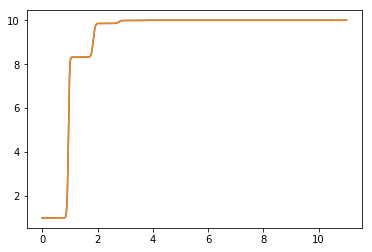

In [6]:
f = np.loadtxt('/Users/armstrongt/Workspace/CTA/PDEvsOCT/Data/configs/GCT-S_pdeoxt001/SPEspectrum_57.50_2.500_0.080.dat', unpack=True)

sig = f[0]
ph_prompt = f[1]
ph_all = f[2]
nsig = len(f[0])
# if ( nsig < 3 )
# {
#   fflush(stdout);
#   fprintf(stderr,"Not enough data in pulse height spectrum\n");
#   return -1;
# }

# if ( make_random_ipol_table(sig,ph_prompt,nsig,xspe_prompt,yspe_prompt) != 0 ||
#     make_random_ipol_table(sig,ph_all,nsig,xspe_bkgrnd,yspe_bkgrnd) != 0 )
# {
#   fflush(stdout);
#   fprintf(stderr,
#     "Error initialising tables for random pulse height lookup\n");
#   return -1;
# }
xspe_prompt, yspe_prompt = make_random_ipol_table(sig, ph_prompt, nsig)
xspe_bkgrnd, yspe_bkgrnd = make_random_ipol_table(sig, ph_all, nsig)

# print(xspe_prompt, yspe_prompt)

nspe_prompt = nsig
nspe_bkgrnd = nsig
if nsig > 0:

    dr = 1./10000.
    r = 0 
    sr = 0.
    sn = 0.
#   for ( r=0.5*dr; r<1.0; r+=dr )
    for r in np.arange(0.5*dr, 1, dr):
  
        sr += random_from_ipol_table(xspe_prompt,yspe_prompt,r)
        sn += 1.0
  
#     if sr/sn > 0.99 and sr/sn < 1.01:
#         print("Average pulse height is %s\n" % sr/sn)
#     else:
#         fflush(stdout);
#         fprintf(stderr,"\nWarning: Your single photoelectron response is not properly normalized!\n"
#              "Expecting an average response of 1.0 (i.e. average p.e. units) but found %f\n\n", sr/sn);
# print(yspe_prompt)
plt.plot(xspe_prompt, 10**np.asarray(yspe_prompt))
plt.plot(xspe_bkgrnd, 10**np.asarray(yspe_bkgrnd))
# plt.yscale('log')
plt.show()

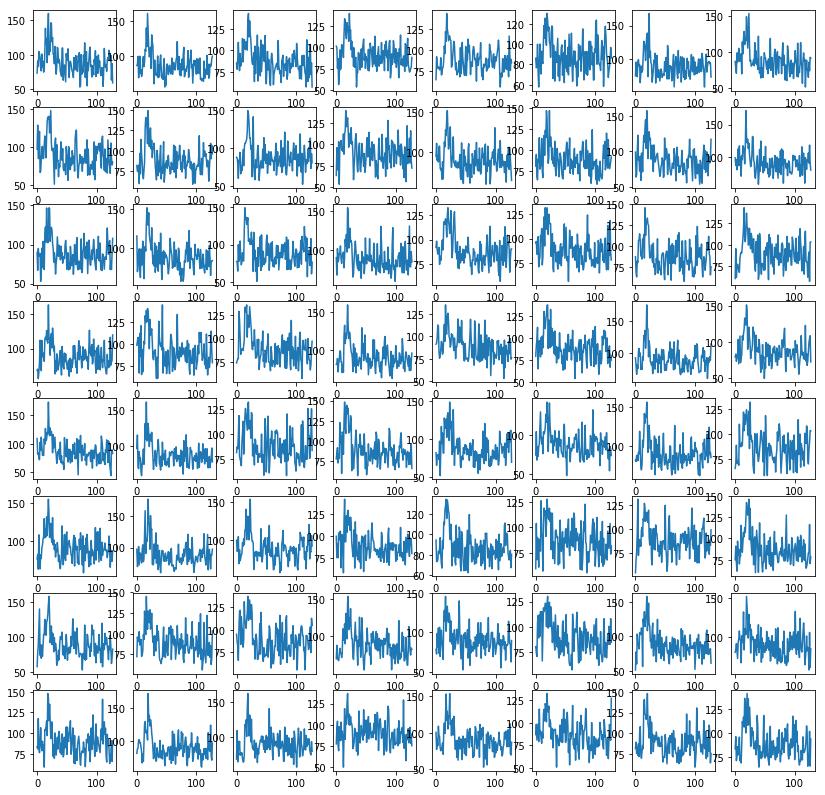

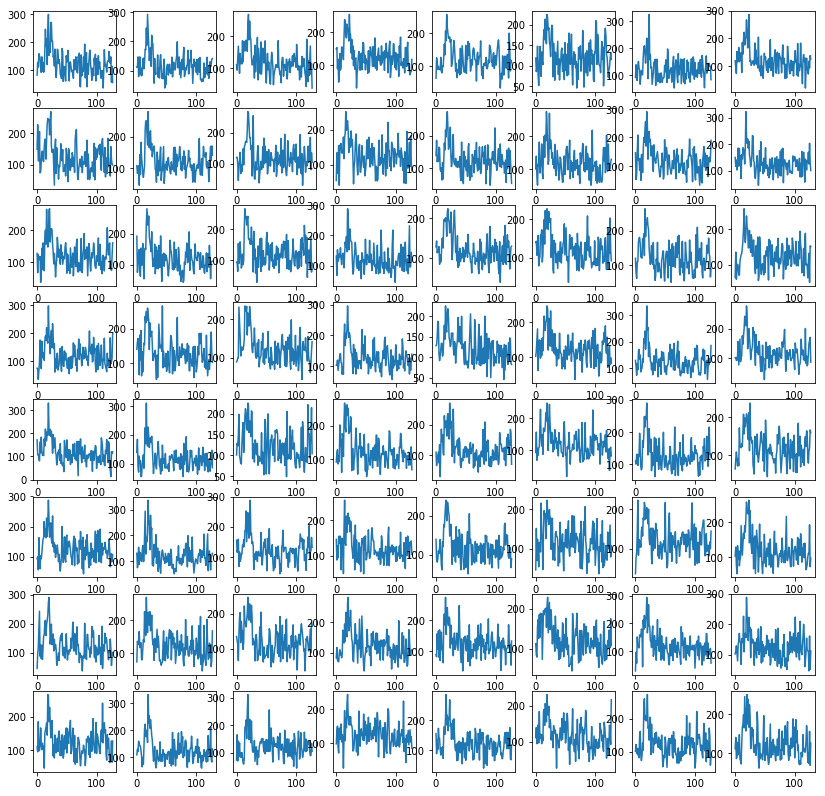

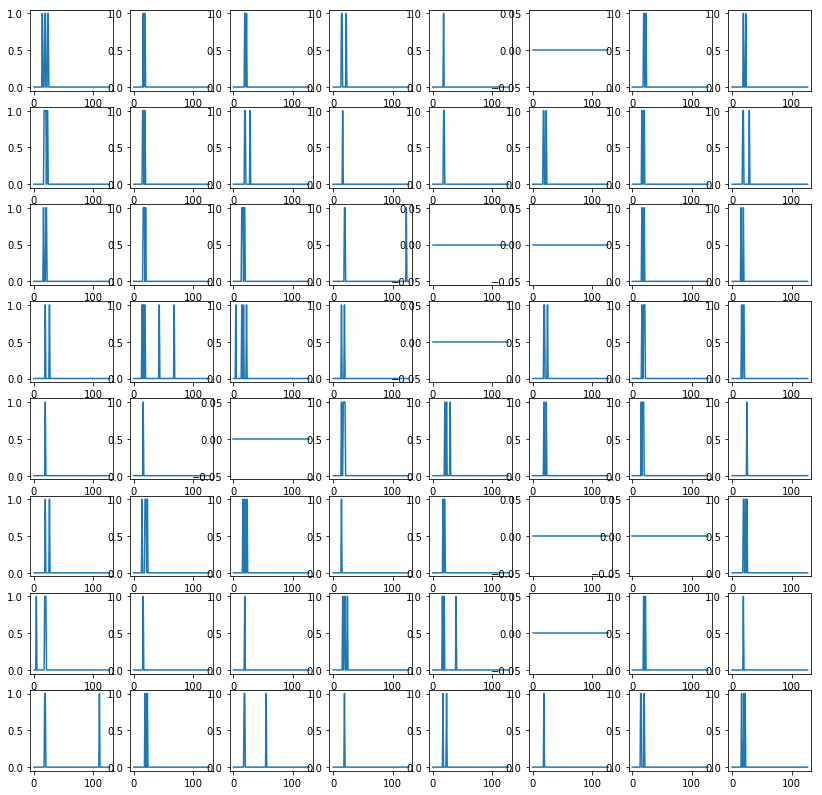

In [46]:
# fig1 = plt.figure(1)
# ax1 = fig1.add_subplot(131)
# ax2 = fig1.add_subplot(132)
# ax3 = fig1.add_subplot(133)

fig2 = plt.figure(2, figsize=[14,14])
fig3 = plt.figure(3, figsize=[14,14])
fig4 = plt.figure(4, figsize=[14,14])

spe_file = np.loadtxt('/Users/armstrongt/Workspace/CTA/PDEvsOCT/Data/configs/GCT-S_pdeoxt001/SPEspectrum_57.50_2.500_0.080.dat', unpack=True)
pulse_shape = np.loadtxt('/Users/armstrongt/Workspace/CTA/PDEvsOCT/Data/configs/GCT-S_pdeoxt001/disc_shape_CHEC-S.dat')

disc_amplitude = 20
fadc_amplitude = 8
disc_thresh = 230
transit_time_jitter = 1
DISC_BITS_PER_BIN =8 #??
background = 0.041*2
background_area = trapz(pulse_shape[1], x=pulse_shape[0])
fadc_off_scale= -1 *fadc_amplitude * background_area * 128
fadc_noise = 2
fadc_pedestal = 40
fadc_var_pedestal = 0.75
fadc_max_signal = 10000
sensitivity = 1

pe_counts = np.zeros(2048,dtype=int)

pe_times = np.random.normal(loc = 20, scale=4 ,size=100)
pedestal_sysvar = 0.04
pedestal_sysoff = np.random.normal(0.5, pedestal_sysvar)

    #.... Resetting of parameters.....
for ipix in range(0,64):
    ax4 = fig2.add_subplot(8,8,ipix+1)
    ax5 = fig3.add_subplot(8,8,ipix+1)
    ax6 = fig4.add_subplot(8,8,ipix+1)
    raw_signal = np.zeros(128)
    discriminator = np.zeros(128)
    signal = np.zeros(128)
    ideal_signal = 0.
    cherenkov_pe = 0
    triggered = triggered_in_time = 0
    significant = 0
    peak_simple = peak_pp = peak_sc = peak_pos = -10000
    npe = pe_counts[ipix]
    median_time = 0.
    
# #           /* Add FADC and (if selected) discriminator pulses for */
# #       /* photoelectrons in the 'signal'. */    
    for ipe in range(len(pe_times)):
        peak = random_from_ipol_table(xspe_prompt,yspe_prompt,np.random.uniform())
        ideal_signal += peak
        cherenkov_pe += 1
        peak_dsc  = peak * disc_amplitude;
        peak_fadc = peak * fadc_amplitude;
#         t = atimes[ipix] + transit_delay
        t=int(pe_times[ipe])
        for ibin in range(len(pulse_shape[0])):
            raw_signal[ibin+t] += peak_fadc* pulse_shape[1][ibin]
            discriminator[ibin+t] += peak_dsc* pulse_shape[1][ibin]

          
# #                 /* Background photoelectrons */
    npe_bkg_tote = 0
    for ibin0 in range(0, 128):
        npe_bkg = np.random.poisson(background*128)
        npe_bkg_tote += npe_bkg
        peak = 0
        if npe_bkg > 20:
#                 /* Note: the 0.44 is only valid for our standard single-p.e. distribution
#                    but having more than 20 p.e.s per slice is rather unlikely. */
            peak = npe_bkg * np.random.normal(1., 0.44/np.sqrt(npe_bkg));
            if peak < 0.:
                peak = 0.
        else:
            for ibkg in range(0,npe_bkg):
                peak += random_from_ipol_table(xspe_bkgrnd, yspe_bkgrnd, np.random.uniform())

        peak_dsc  = peak * disc_amplitude;
        peak_fadc = peak * fadc_amplitude;
        #Simplified, should pulse should be half way back:
        for ibin in range(len(pulse_shape[0])):
            try:
                raw_signal[ibin0+ibin] += peak_fadc* pulse_shape[1][ibin]
                discriminator[ibin0+ibin] += peak_dsc* pulse_shape[1][ibin]

            except:
                continue

#       /* AC or DC coupling of the FADC */
#       fadc_off = ch->fadc_off_scale * ch->background;
    fadc_off = fadc_off_scale * background # TODO Not sure about this
#     print('tote bkg = ', npe_bkg_tote)
# #           /* Cross-talk of channels should be included here ... */
# #       /*
# #          ...
# #       */

# #       /* Digitize the signal at the FADC */
    for ibin in range(0,128):
        raw_signal[ibin] += np.random.normal(fadc_off, fadc_noise)
        signal_tmp = sensitivity * raw_signal[ibin] + fadc_pedestal + pedestal_sysoff
        if signal_tmp < 0:
            signal_tmp = 0
        elif signal_tmp > fadc_max_signal:
            signal_tmp = fadc_max_signal
            
#         print(signal_tmp)
        signal[ibin]=signal_tmp
        #   

#     ax1.plot(range(0,128), signal)
    ax5.plot(range(0,128), discriminator)
#     ax2.plot([0,128],[disc_thresh,disc_thresh], color='k')
    ax4.plot(range(0,128), signal)
    bover=[]
    for i in discriminator:
        if i > disc_thresh:
            bover.append(1)
        else:
            bover.append(0)
    ax6.plot(range(0,128),bover)
#     ax3.set_xlim(20,40)


plt.show()

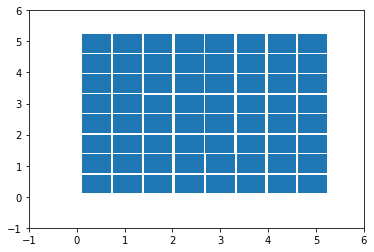

In [31]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

fig1=plt.figure(1)
ax=fig1.add_subplot(111)

r= 0.6
patches = []

pixel_file = np.loadtxt('/Users/armstrongt/Workspace/CTA/MCValidation/src/camera_CHEC-S_GATE.dat', unpack=True)
for i in range(len(pixel_file[0])):
    if pixel_file[2][i] > 0 and pixel_file[2][i] <5 and pixel_file[3][i] > 0 and pixel_file[3][i] < 5:
        x = pixel_file[2][i]
        y = pixel_file[3][i]
#         print(pixel_file[0][i])
#         plt.scatter(x, y)
        poly = Rectangle((x-r/2,y-r/2), width=r, height = r, fill=True)
        patches.append(poly)
        
pixels = PatchCollection(patches, cmap=None, linewidth=0)
ax.add_collection(pixels)

plt.xlim(-1,6)
plt.ylim(-1,6)
plt.show()

array([ 20.56222062,  24.04677488,  18.09637663,  24.73757583,
        20.69108559,  24.02703305,  11.46698175,  12.97323505,
        17.80579732,  23.80203622,  15.5518005 ,  12.79919564,
        24.83951283,  13.26483276,  15.98258387,  13.97815174,
        20.67984076,  14.73193434,  17.65182259,  20.27466993,
        14.45260674,  21.18303934,  10.95120973,  21.3866903 ,
        14.87637002,  12.9044132 ,  21.06593399,  22.3832451 ,
        19.21577813,  17.47848572,  16.35760509,  18.25479567,
        21.24160257,  17.12761655,  21.8848196 ,  11.92894187,
        17.51454613,  16.38723907,  14.93884572,  19.50287778])